![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from time import time

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import datasets
from sklearn.utils.multiclass import unique_labels

# Features reduction techniques

Features reduction in machine learning is a really important topic. The needing of reducing the number of features is two-fold:

1. Numerically, having a low number of features to analyse speeds up the model fit.
2. Theoretically, a low number of features is more under control, more stable and a difference in features between instances is more easily appreciated by the machine learning model.

The aim of this notebook is to explore the two most common techniques of features reduction.

* [__Principal component analysis__](https://en.wikipedia.org/wiki/Principal_component_analysis) or PCA
* [__t-distributed stochastic neighbor embedding__](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) or tSNE

Of course, dimensionality reduction is a huge topic and can be accomplished by many different and fancy methods, however, the two above fit very well our purposes.

## Principal Component Analysis

Let's start by describing the dimensional reduction known as principal component analysis.


PCA is fundamentally (as said) a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

### PCA as a projection

Mathematically, it is really easy to define what PCA does.

It is a [_projection_][1] of an $n$-dimensional space onto a $k$-dimensional subspace, meaning a linear map selecting $k$ (linearly independent) vectors out of $n$ and defining the projection of all points of the $n$-dimensional space onto the $k$-dimensional one. 

The choice of the $k$ vectors is made according to a very precise and intuitive rule.

> The principal components analysis converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called __principal components__.
This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated __orthogonal basis set__.

[1]: https://en.wikipedia.org/wiki/Projection_(linear_algebra)

To rephrase, PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using linear algebra and something known as the _eigenvalues_ and _eigenvectors_ of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.

__Note__: for those who are interested in mathematical derivation, we can discuss about it in front of a beer. 

If you do not drink (may God forgive you) you can have a look at [this page](https://www.math.hmc.edu/calculus/tutorials/eigenstuff/) or directly at [Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).

### Motivational Example

Consider the following dataframe (we are getting tired of iris flowers, so we use wine).

In [2]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names

We want to visualise the most relevant components, meaning the features mostly contribuiting to the information for machine learning procedures, _i.e._ the ones with highest variance.

In [3]:
pca = PCA(n_components=2)
projected = pca.fit_transform(df);

We projected onto a $2$-dimensional plane, spanned by two vectors, that is the two components of the PCA.

In [4]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

#### Motivation $1$: Data visualisation

We can plot the projections of point onto this plan, since now we are in two dimensions.

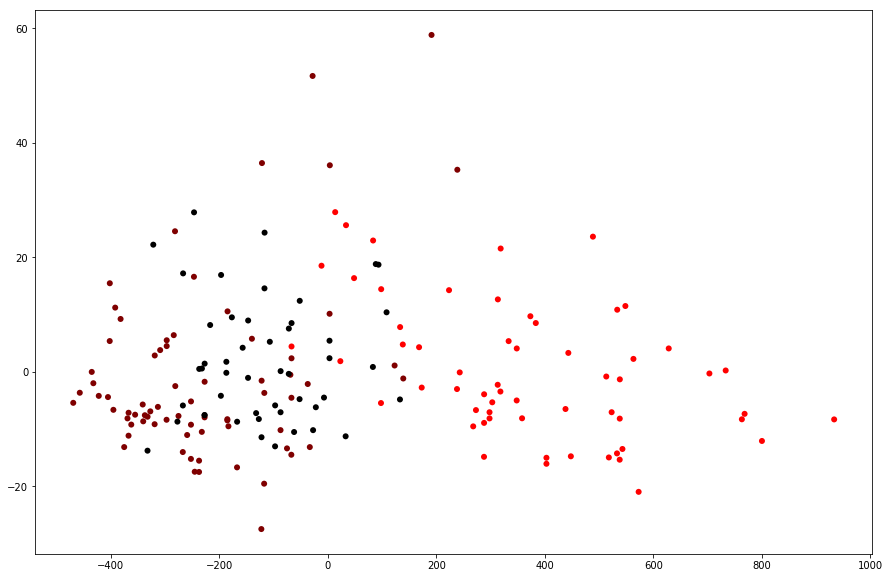

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:,0],projected[:,1], c=wine.target, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('flag', 3));

### Reconstruction

As said, PCA is a projection. This means, we are losing information using the PCA-reduced data, instead of the row ones.
One can calculate the error, by comparing the _inverse transformation_ result (meaning the reconstructed data) with the original ones.

This might be clear by an example.

Consider we have an $n$-dimensional space, meaning $n$ features. We choose to project onto a $k$-dimensional subspace.

The projection matrix $U$ is $n\times k$.

Then projected coordinates are,

$$ z = U^T x \, .$$

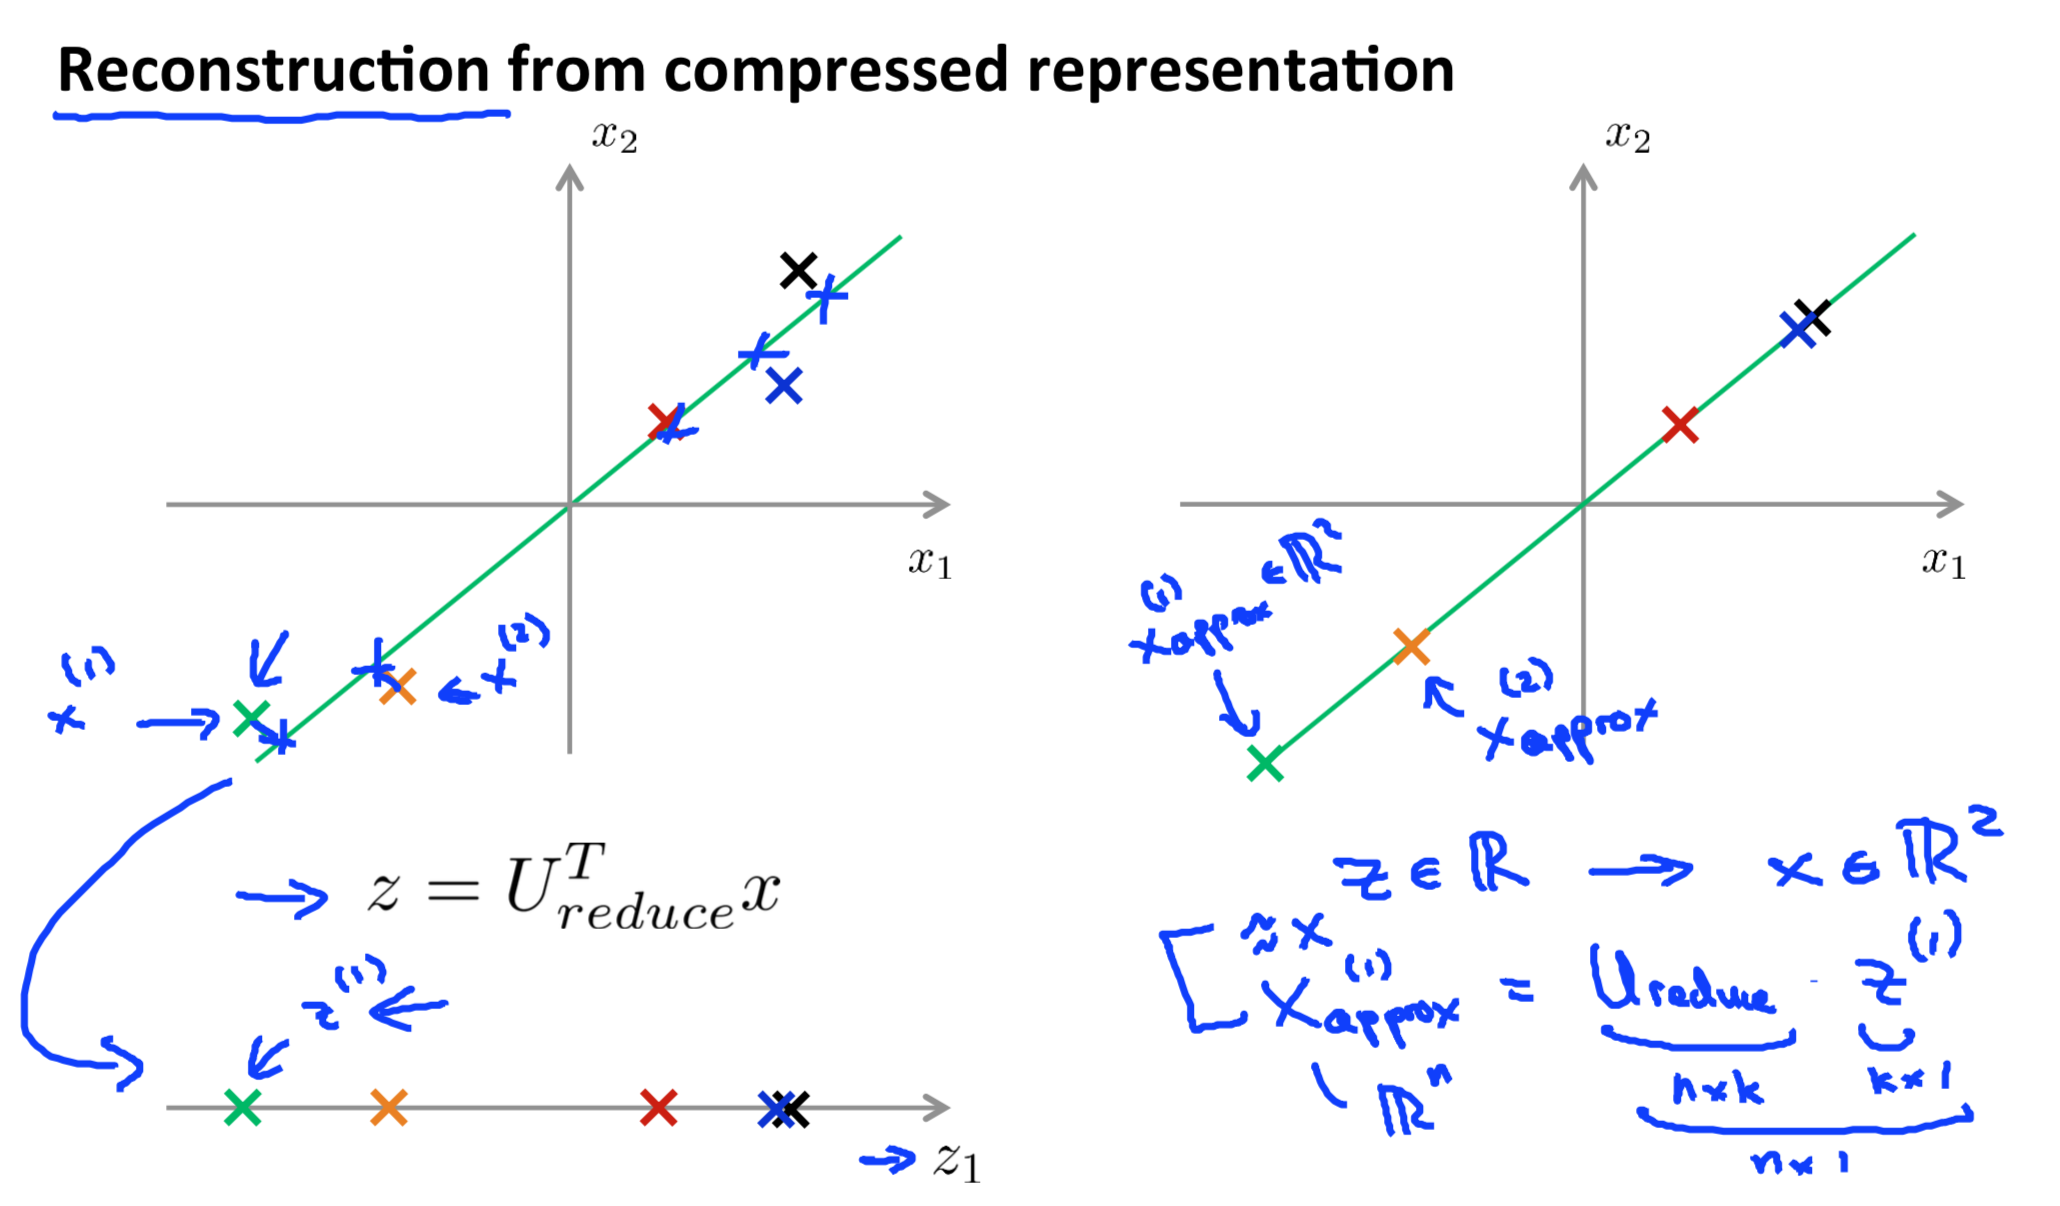

To find the reconstructed features $\tilde{x}$ one has to use the matrix $U$, which is $k \times n$,

$$ \tilde{x} = U z \, .$$

The error can be calculated, for instance, by a simple difference,

$$ \varepsilon = \vert x - \tilde{x} \vert \, .$$

## Some more words

Until now, we had an insight about PCA and its behaviour. 

We want to work on another example to better understand the projection procedure. This is easier to visualize by looking at a two-dimensional dataset. 

We consider a dataset of $200$ points.

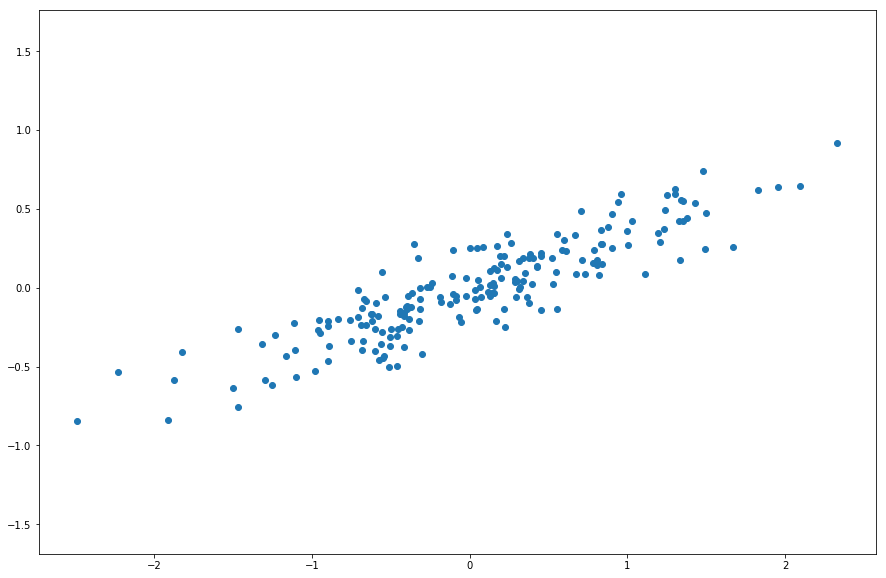

In [6]:
rng = np.random.RandomState(1) # 200 random points
plt.figure(figsize = (15,10))
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

By eye, it is clear that there is a nearly linear relationship between the $x$ and $y$ variables. The problem setting here is slightly different: rather than attempting to predict the $y$ values from the $x$ values, we want to learn about the relationship between the $x$ and $y$ values.

We will be more specific later on, but this is the first example of __unsupervised learning problem__.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using [Scikit-Learn's PCA estimator](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), we can compute this as follows.

In [8]:
pca = PCA(n_components=2)
pca.fit(X);

The fit learns some quantities from the data, most importantly the `components` and `explained variance`. In order to visualise all of the methods available one can make use of the command `dir`.

In [9]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transfor

Let's visualise the ones we are mostly interested in.

In [10]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the `components_` to define the direction of the vector, and the `explained variance_` to define the squared-length of the vector.

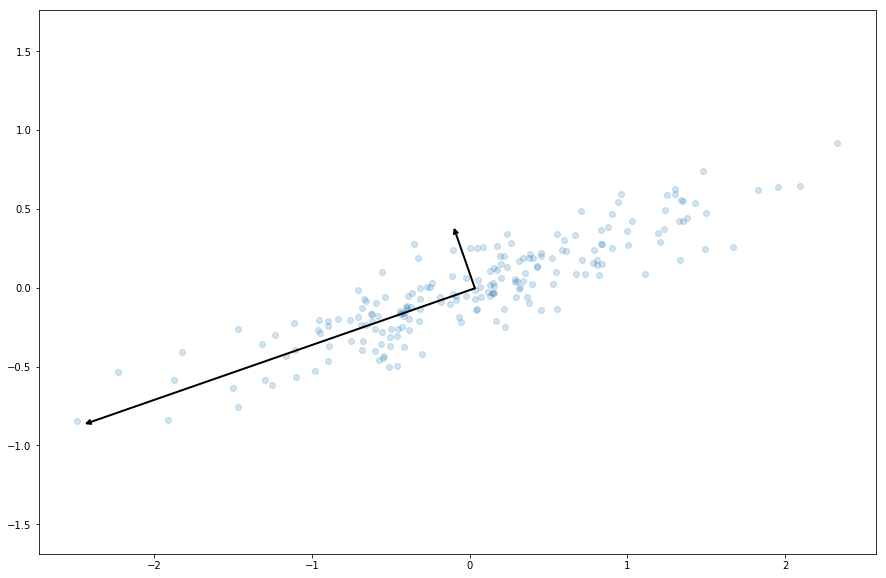

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize = (15,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes (or components) of the data, and the length of the vector is an indication of how important that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the __principal components__ of the data.

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

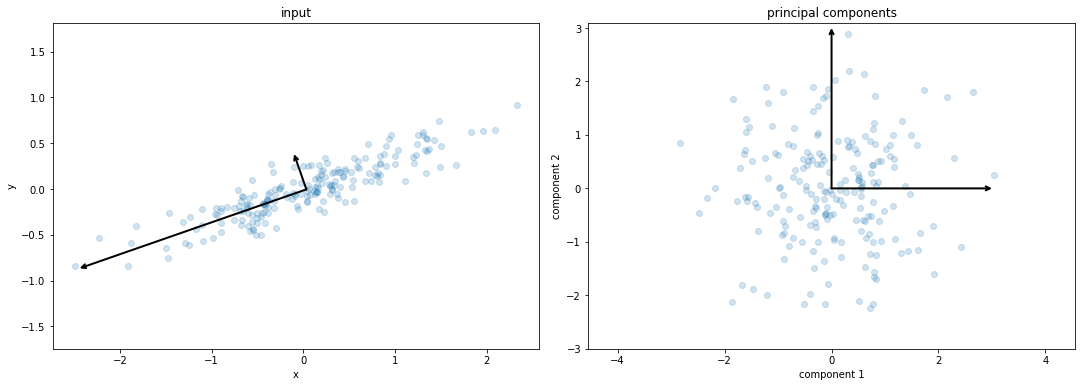

In [13]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

As a consequence of this, one can see from the plot above that approximating the two-dimensional dataset with a one-dimensional one is a good approximation if and only if the dimension is the greater principal component.

This observation is the key for the dimensional reduction algorithm based on PCA, we are going to describe.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform. We perform precisely the projection to one-dimension mentioned above.

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

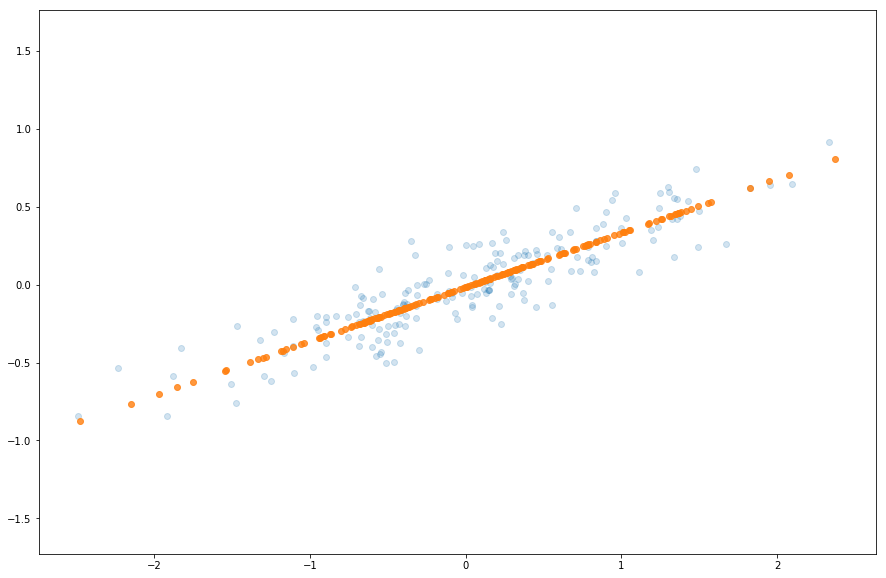

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize = (15,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light blue points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much _information_ is discarded in this reduction of dimensionality.

#### Motivation $2$: Data compression

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by $50\%$, the overall relationship between the data points are mostly preserved.

This has as huge advantage an heavy reduction of computational costs.
In other words, we performed a smart reduction of data, leaded by the will of keeping as much as information possible.

#### Note

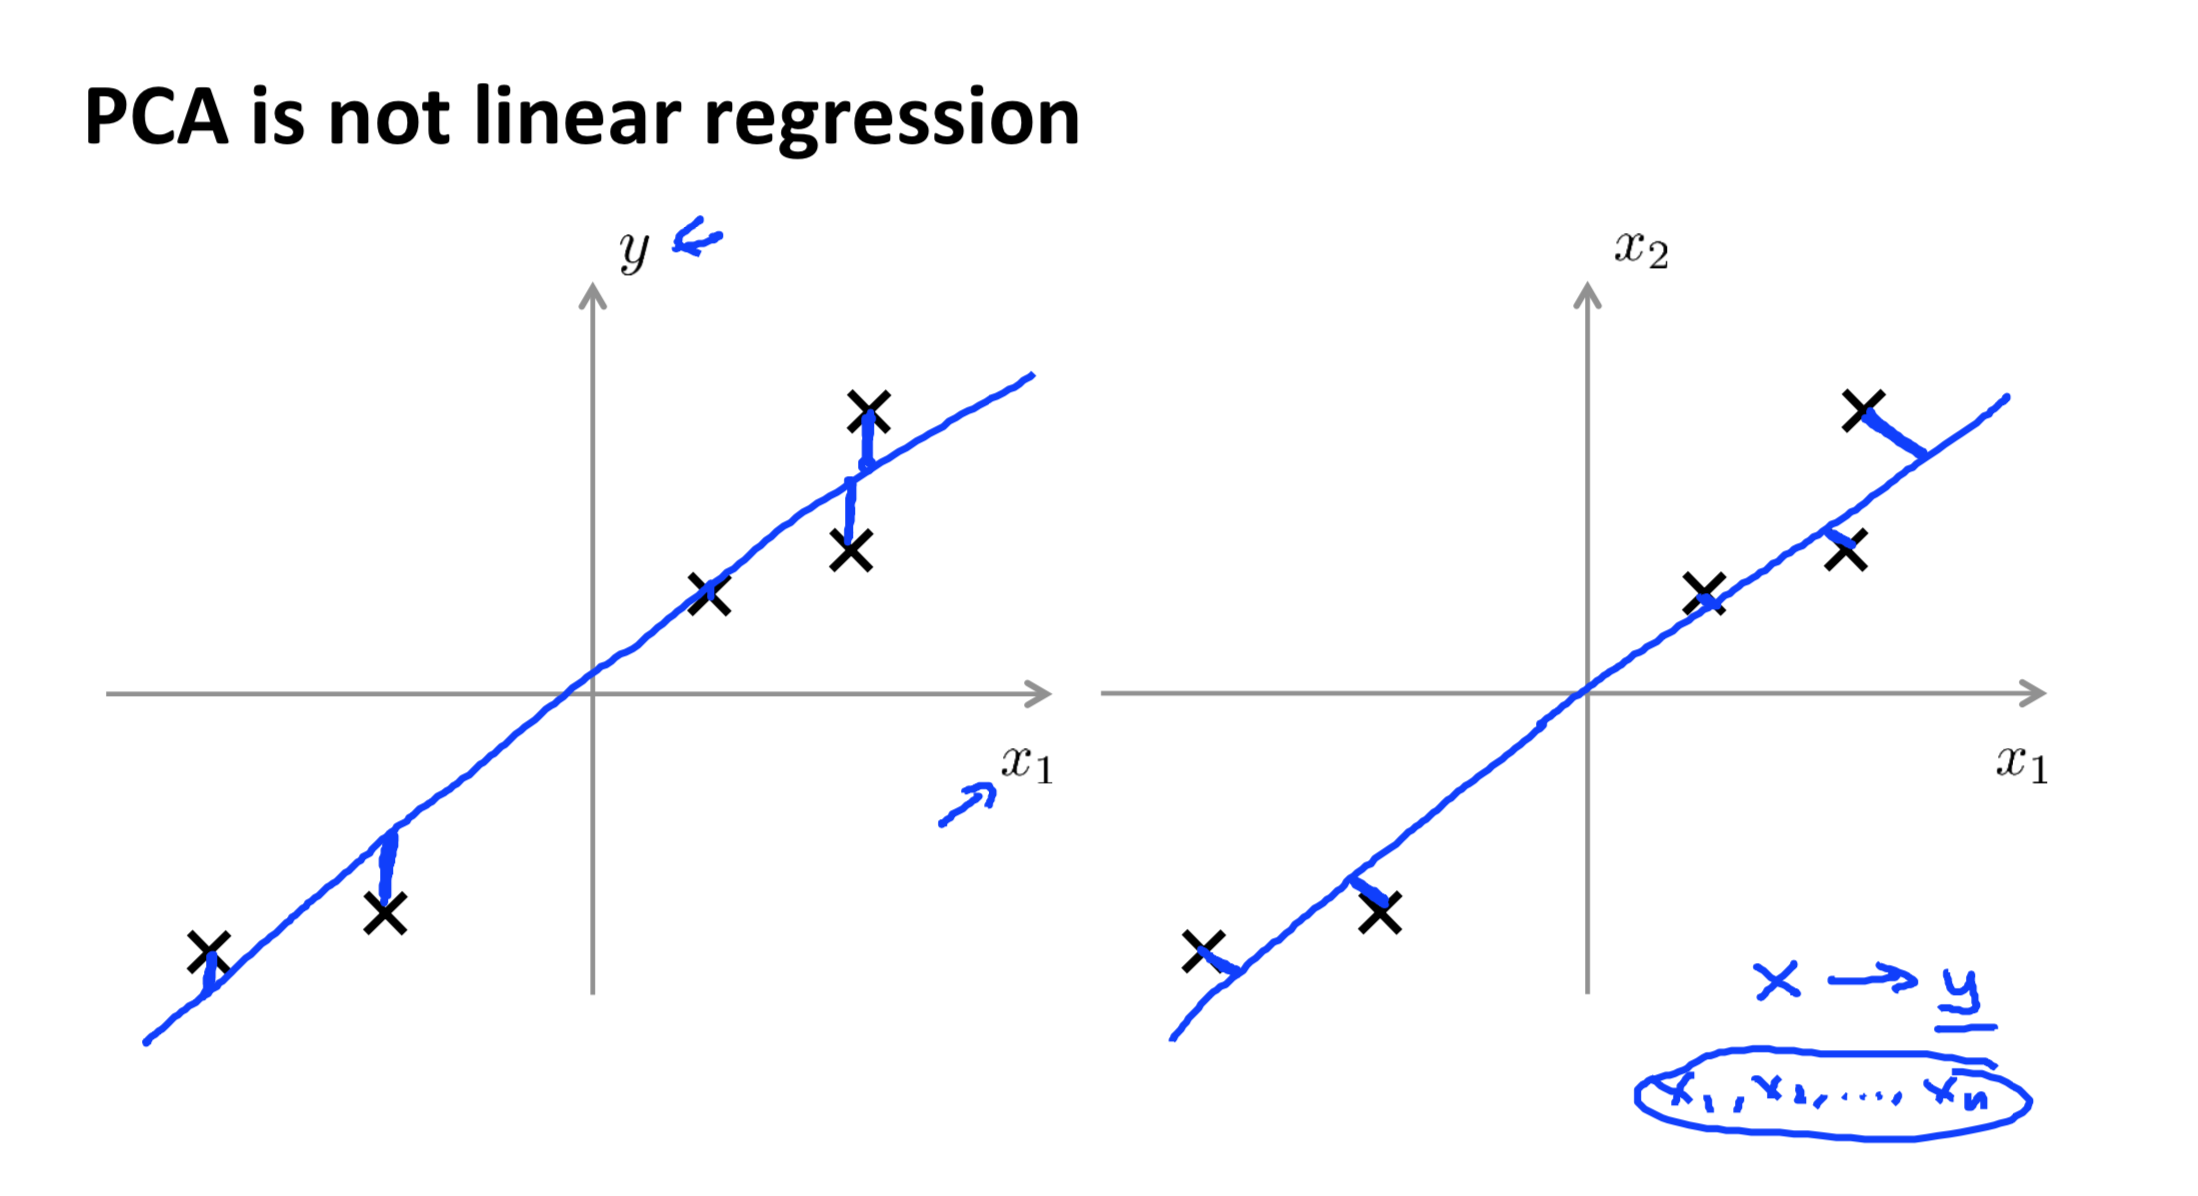

PCA is a projection. Intuitively, one can give the following euristic definition of the projection method.

![title](http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png)

### PCA for data visualisation

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. Indeed, it is not possible to plot the entire set of data in a space with dimension higher than $3$, and even a three-dimensional plot might be not easy to visualise sometimes. 

To explore this, let's take a quick look at the application of PCA to the famous digits data.

In [16]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of $8\times 8$ pixel images, meaning that they are $64$-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions. How many? Try to guess. Two.

In [17]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We are now allowed to plot the first two principal components of each point to learn about the data.

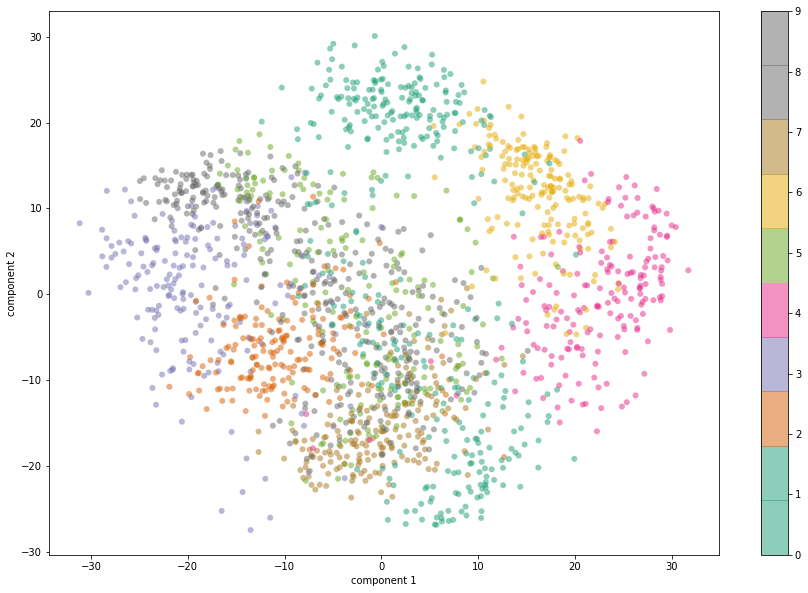

In [18]:
plt.figure(figsize = (15,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a $64$-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in $64$-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Components analysis

We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of $64$ pixel values, which we can collect in the vector $x$,

$$ x = \left[ x_1 , \ldots, x_{64} \right]\, .$$

One way we can think about this is in terms of a pixel basis. 
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image.
Formally,

$$ \mathrm{img}(x) = x_1 \cdot \mathrm{px}_1 + \ldots + x_{64} \cdot \mathrm{px}_{64}\, .$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. 
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly $90\%$ of the pixels!

In [19]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

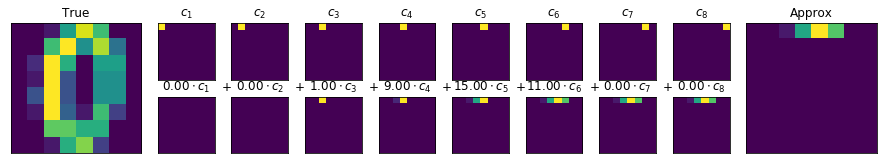

In [20]:
digits = datasets.load_digits()

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the $64$-pixel image. Were we to continue this sequence and use all $64$ pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$ \mathrm{img}(x) = x_0 + x_1 \cdot \mathrm{bs}_1 + x_{2} \cdot \mathrm{bs}_{2} +  \ldots \, . $$

__When to stop?__ 
One might think PCA as a procedure to optimally choose a basis such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.

In this view, PCA selects the first (as relevance) $k$ elements of such a basis, defining an _hyperplane_ and projecting the data over such $k$-dimansional plane.

The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. 

We can plot a figure showing a similar depiction of reconstructing the digit using the mean plus the first eight PCA basis functions.

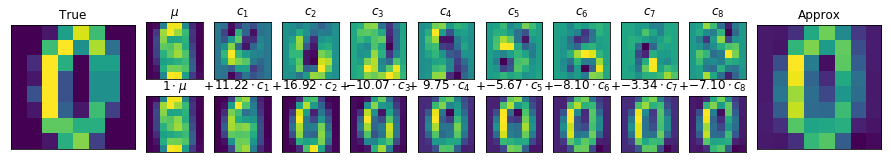

In [21]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)

fig = plot_pca_components(digits.data[10], Xproj[10], pca.mean_, pca.components_)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to  efficiently describe the data. One method to face this issue is looking at the so-called _cumulative explained variance ratio_ as a function of the number of components. 

This can be done easily since in scikit-learn pca, one has the `explained_variance_ratio_` method.

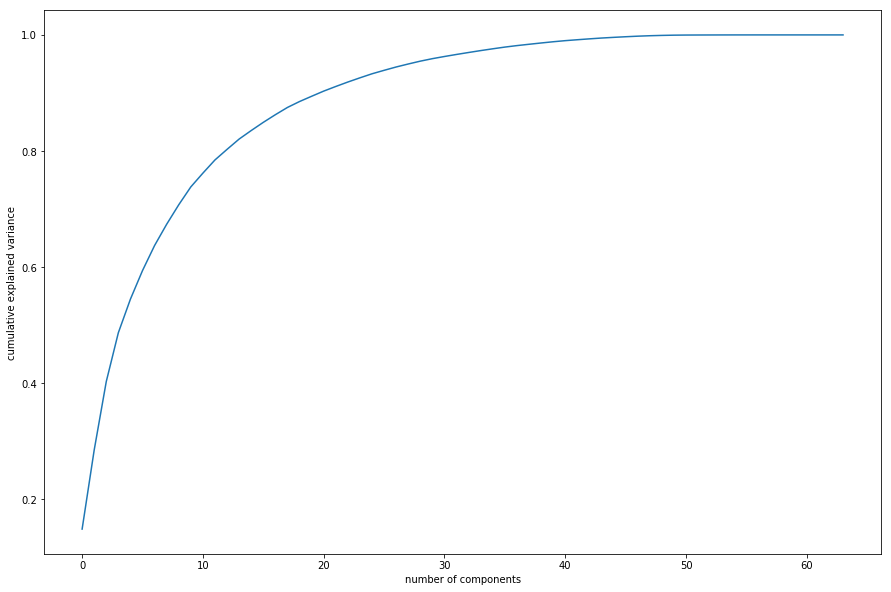

In [22]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, $64$-dimensional variance is contained within the first $N$ components, sorted by variance. 
For example, we see that with the digits the first $10$ components contain approximately $75\%$ of the variance, while you need around $45$ components to describe close to $100\%$ of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we would need about $20$ components to retain $90\%$ of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as Noise Filtering

An example of fancy use of PCA. It can also be used as a filtering approach for noisy data. 

The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data.

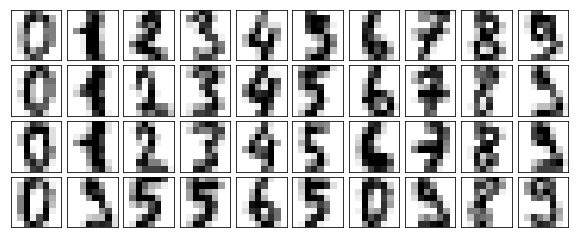

In [23]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data);

Now lets add some random noise to create a noisy dataset, and re-plot it.

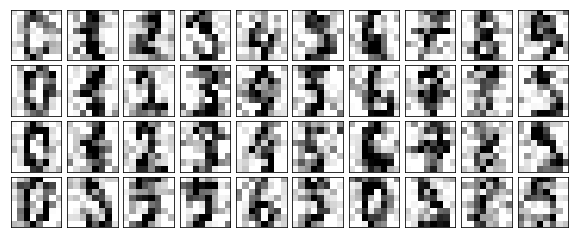

In [24]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It is clear that the images are noisy, and contain spurious pixels. 

Let's train a PCA on the noisy data, requesting that the projection preserve $50\%$ of the variance.

This can be done by setting `n_components =  0.5`, as one can read in [pca documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html),

> If `0 < n_components < 1` and `svd_solver == 'full'`, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by `n_components`.

In [25]:
pca = PCA(n_components=.5).fit(noisy)
pca.n_components_

12

This means, $50\%$ of the variance amounts to $12$ principal components. 
Now, we compute these components, and then use the inverse of the transform to reconstruct the filtered digits.

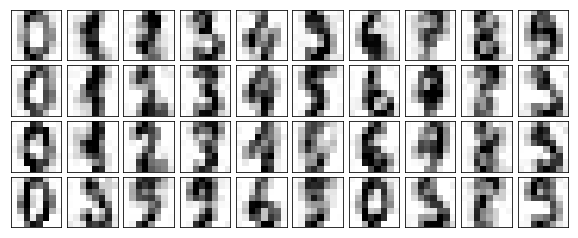

In [26]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Exercise

Apply PCA for image compression of the following images. Then replot the invers transformed image.

We are going to use the Olivetti face image dataset, again available in `scikit-learn`. Would like to reduce the original dataset using PCA, essentially compressing the images and see how the compressed images turn out by visualizing them.

First of all load dataset and plot the face images.

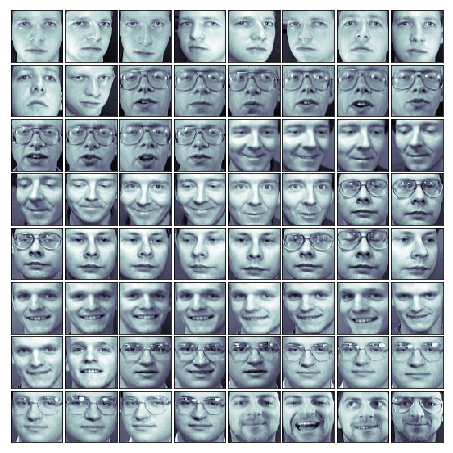

In [19]:
oliv = datasets.fetch_olivetti_faces()

#Setup a figure 6 inches by 6 inches 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # plot the faces, each image is 64 by 64 pixels 
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest') 

plt.show();

Then, let's explore the shape of the dataset. This tells us that we have $400$ images each of them of $64 \times 64 = 4096$ pixels each.

In [20]:
oliv.data.shape

(400, 4096)

We want to compress down to $8 \times 8$ pixels. Apply PCA and store the result in a matrix $X_{proj}$.

In [21]:
X, y = oliv.data, oliv.target 
pca = PCA(n_components=64)
X_proj = pca.fit_transform(X)

X_proj.shape

(400, 64)

Let's see how much of the variance is retained.

In [31]:
retained_var = np.sum(pca.explained_variance_ratio_)
print('The variance retained by such a reduction is %.1f%% of the total' %(retained_var*100))

The variance retained by such a reduction is 89.7% of the total


If everything has been done correctly you should have obtained more than the $89\%$.

This is great so far. Now we have a reduced $64$-dimensional dataset, generated with $64$ principal components. 
Each of these principal components can explain some variation in the original dataset. The parameter `components_` of the estimator object gives the components with maximum variance.

Now we will try to visualize the top $8$ principal components. 
This is NOT a reconstruction of the original data, just visualizing the principal components as images. 
The principal components are vectors of the length = to the number of features, _i.e._ $4096$. 
We will need to reshape it to a $64 \times 64$ matrix.

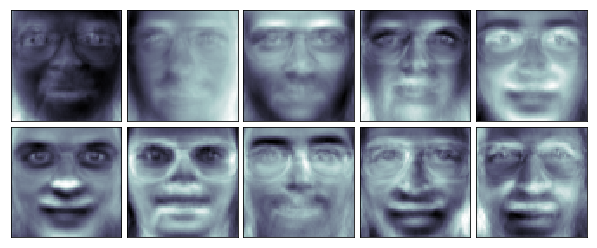

In [32]:
#Setup a figure 8 inches by 8 inches 
fig = plt.figure(figsize=(8,8)) 

# plot the faces, each image is 64 by 64 pixels 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

These are the $8$ principal components, in some sense the basis of our reduced dataset.

Let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the $64 \times 64$ pixel images into $8 \times 8$ images. 
Now to visualize how these images look we need to inverse transform the $8 \times 8$ images back to $64 \times 64$-dimension. Note that we are not reverting back to the original data, we are simply going back to the actual dimension of the original images so we can visualise them.

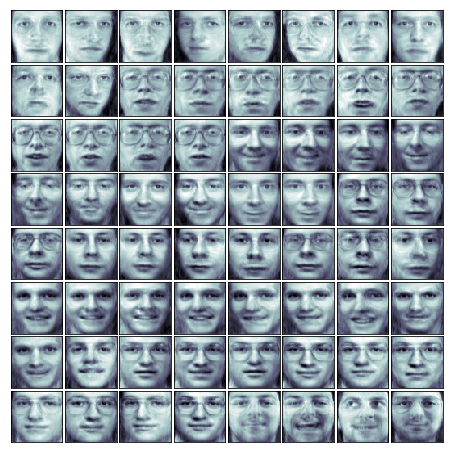

In [34]:
X_inv_proj = pca.inverse_transform(X_proj) #reshaping as 400 images of 64x64 dimension 
X_proj_img = np.reshape(X_inv_proj,(400,64,64)) #Setup a figure 8 inches by 8 inches 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

This is not bad at all, the image still looks pretty good but the finer details are missing, which is okay considering we have reduced dimensionality by $64$ times. 

## t-Distributed Stochastic Neighbor Embedding

In the first part of the lecture, we discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. 
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, the advice is to tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data, and to understand the intrinsic dimensionality (by plotting the explained variance ratio). 
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by _outliers_ in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. [Scikit-Learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) contains a couple interesting variants on PCA, including `RandomizedPCA` and `SparsePCA`, both also in the `sklearn.decomposition` submodule. `RandomizedPCA`, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while `SparsePCA` introduces a regularisation term that serves to enforce sparsity of the components.

My advice in practice is, try to use raw data when you design your machine learning algorithm and go for PCA techniques only later and if necessary.

### t-SNE

We have seen how principal component analysis (PCA) can be used in the dimensionality reduction task—reducing the number of features of a dataset while maintaining the essential relationships between the points. While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I would suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in that two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.

Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. 
Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space. This is what mathematicians call _topological_ methods, but you do not have to be scared by names.

__T-distributed Stochastic Neighbor Embedding__ or __t-SNE__ is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space, by a non-linear projection on a lower dimensional space. 

It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

The t-SNE algorithm comprises two main stages. 

1. t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar points have an extremely small probability of being picked. 

2. t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimises the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (_i.e._ a distance to compare probability distributions) between the two distributions with respect to the locations of the points in the map. 

Note that while the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, one can change this as appropriate for the problem.

### How this differs from PCA?

PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. 
In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. Think of a manifold structure as any geometric shape like: cylinder, ball, curve, etc.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 

Laurens illustrates the PCA and t-SNE approach pretty well using the Swiss Roll dataset in figure below. You can see that due to the non-linearity of this toy dataset (manifold) and preserving large distances that PCA would incorrectly preserve the structure of the data.

![](https://www.kdnuggets.com/wp-content/uploads/tsne-swiss-roll.jpg)

The image above, known as __Swiss Roll Dataset__. Preserve small distance with t-SNE (solid line) vs maximizing variance PCA.

An additional observation one may rise is the fact that PCA is a linear algebra model, thus everything is deterministic, on the converse, t-SNE is not a deterministic technique but a probablistic one, since it deals with sthocastic distributions.

The [original article](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) - I advice to have a look at it - describes the t-SNE working mechanism as follows

> "_t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding._"


Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique. For example one of the recommendations is that, in case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE. 
This is precisely what we are going to do in the next, by applying an initial PCA to our data, before proceeding with t-SNE.

### Working on an example

As usual, we feed our minds with an example to better understand the working of algorithms.

First of all the data, we use the digits dataset. We only focus on the first $6$ digits ($0$-$5$), so we can save memory, computational time and plots will be clearer.

We are going to apply PCA and t-SNE as dimensional reduction algorithms in order to plot data on a two-dimensional graph. Hence, we will compare the results.

Let's start by loading data.

In [27]:
digits = datasets.load_digits(n_class=6) # Reduce the number of classes to not have messy plots
X = digits.data
y = digits.target
n_samples, n_features = X.shape

Let's visualise the dataset we loaded.

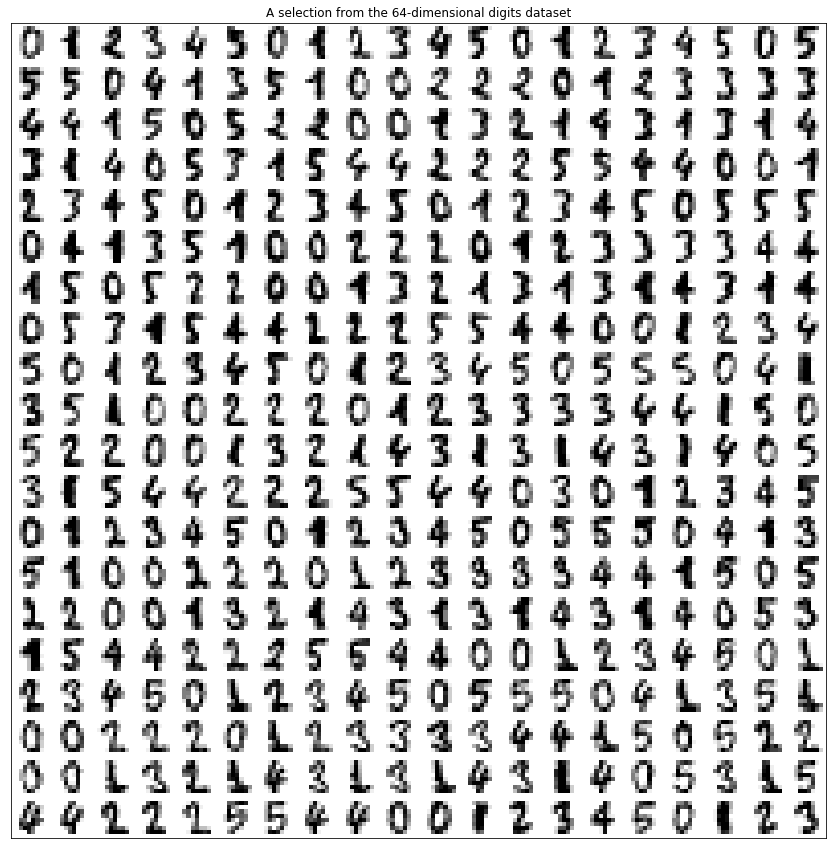

In [28]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.figure(figsize=(15,15))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset');

Here, let us define a function to plot the result of the projections.

In [29]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15,15))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

We are now ready for the action.

First of all we apply PCA, projecting on a two-dimensional space, _i.e._ `n_components = 2`, then thanks to the function defined above, we plot the result of the PCA reduction.

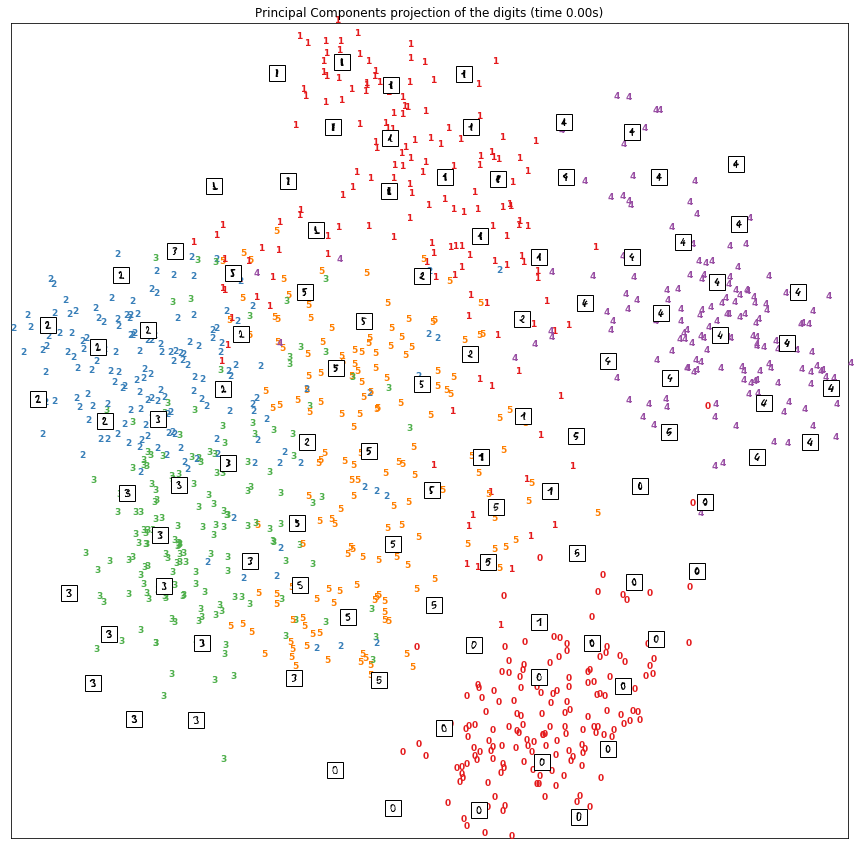

In [30]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Let's do the same with t-sne. We follow the instructions above, since we are dealing with a quite large dataset and t-SNE scales with the square of the number of data, that is $\sim \mathcal{O}(n^2)$, we have to feed it with pre-processed data. To do this, we use again pca, thanks to the `init` parameter of the [`sklearn` implementation of t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) we can set `pca`-reduced data and let the library do the rest of the work for us.

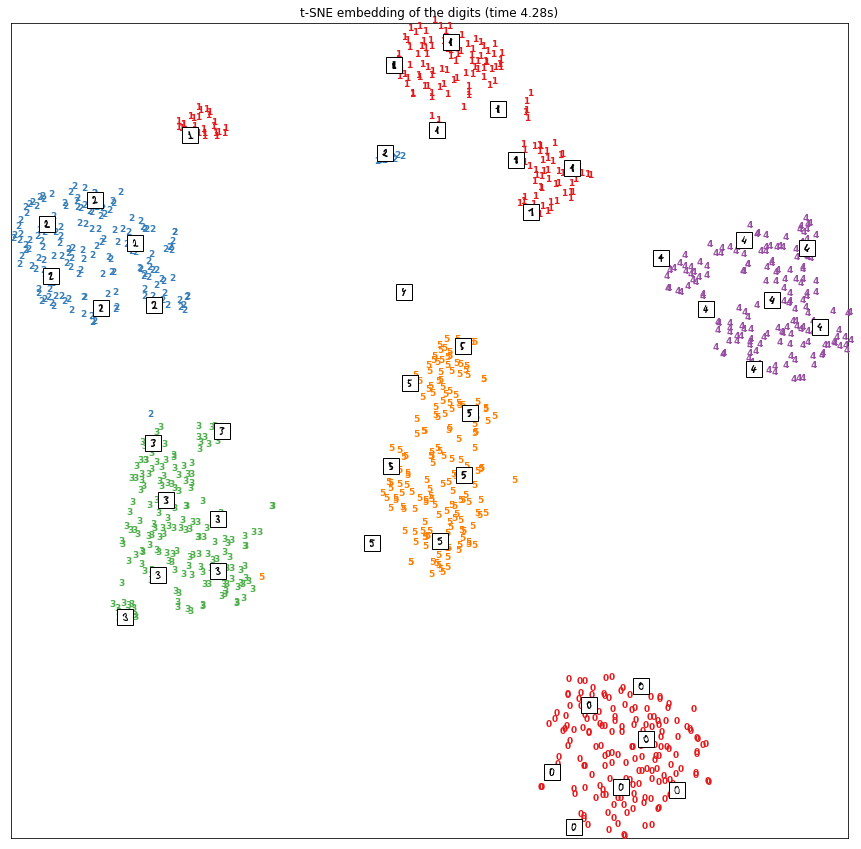

In [31]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

### Observations

__What do we get form the comparison above?__

Brief answer: PCA is faster by orders of magnitude, however, the result is a bit messy. On the other hand, the t-SNE result is really well separated, at the price of a higher computational cost.

From the PCA graph we can clearly see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart.

On the other hand, for t-SNE reduction, we can see that the digits are very clearly clustered in their own sub groups.
If we would now use a clustering algorithm (we will see this later) to pick out the seperate clusters we could probably quite accurately assign new points to a label.